In [1]:
!pip install pycaret

In [2]:
from google.colab import drive

drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data/creditcard.csv")

In [4]:
data_unseen = df.sample(frac=0.1, random_state=42)     
df = df.drop(data_unseen.index)                       

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [5]:
from pycaret.classification import *
df_proccess = setup(data=df, target = 'Class',polynomial_features=True, fix_imbalance = True)

,Description,Value
0,session_id,2096
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
top5 = compare_models(sort = 'F1',n_select = 5,fold=5,exclude = ['rf', 'gbc','ada','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9996,0.9712,0.8476,0.8993,0.8723,0.8721,0.8727,28.554
lightgbm,Light Gradient Boosting Machine,0.9993,0.9839,0.8381,0.8036,0.8180,0.8176,0.8191,8.104
dt,Decision Tree Classifier,0.9983,0.8803,0.7619,0.5107,0.6110,0.6102,0.6227,26.912
nb,Naive Bayes,0.9940,0.9743,0.8635,0.2077,0.3349,0.3330,0.4218,0.522
lda,Linear Discriminant Analysis,0.9896,0.9858,0.8825,0.1343,0.2327,0.2303,0.3413,3.226
ridge,Ridge Classifier,0.9896,0.0000,0.8825,0.1342,0.2325,0.2302,0.3412,0.508
qda,Quadratic Discriminant Analysis,0.9871,0.9721,0.8825,0.1092,0.1942,0.1917,0.3077,1.510
lr,Logistic Regression,0.9760,0.9733,0.8952,0.0838,0.1515,0.1487,0.2636,11.066
knn,K Neighbors Classifier,0.9812,0.8180,0.6095,0.0562,0.1028,0.0999,0.1810,7.200


In [7]:
tuned_top_1 = tune_model(top5[0],optimize = 'F1',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9836,0.8667,0.8198,0.8426,0.8423,0.8426
1,0.9990,0.9907,0.8571,0.6818,0.7595,0.7590,0.7640
2,0.9991,0.9608,0.7619,0.7207,0.7407,0.7403,0.7406
Mean,0.9992,0.9784,0.8286,0.7408,0.7809,0.7805,0.7824
SD,0.0002,0.0128,0.0473,0.0581,0.0443,0.0443,0.0437


In [8]:
tuned_top_2 = tune_model(top5[1],optimize = 'F1',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,0.9796,0.8762,0.8932,0.8846,0.8844,0.8845
1,0.9994,0.9935,0.8571,0.7965,0.8257,0.8254,0.8259
2,0.9993,0.9747,0.7810,0.7961,0.7885,0.7881,0.7881
Mean,0.9994,0.9826,0.8381,0.8286,0.8329,0.8326,0.8328
SD,0.0001,0.0080,0.0411,0.0457,0.0396,0.0397,0.0396


In [9]:
tuned_top_3 = tune_model(top5[2],optimize = 'F1',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9974,0.9318,0.8952,0.3983,0.5513,0.5502,0.5962
1,0.9959,0.9423,0.8952,0.2848,0.4322,0.4307,0.5037
2,0.9976,0.8988,0.7619,0.3980,0.5229,0.5218,0.5497
Mean,0.9970,0.9243,0.8508,0.3604,0.5021,0.5009,0.5499
SD,0.0008,0.0185,0.0629,0.0534,0.0508,0.0510,0.0378


In [10]:
tuned_top_4 = tune_model(top5[3],optimize = 'F1',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,0.9418,0.6190,0.7558,0.6806,0.6801,0.6835
1,0.9989,0.9454,0.7048,0.6852,0.6948,0.6943,0.6944
2,0.9987,0.9497,0.5619,0.6484,0.6020,0.6014,0.6029
Mean,0.9989,0.9456,0.6286,0.6965,0.6592,0.6586,0.6603
SD,0.0001,0.0032,0.0587,0.0446,0.0408,0.0409,0.0408


In [13]:
tuned_top_5 = tune_model(top5[4],optimize = 'F1',fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9898,0.9866,0.9048,0.1367,0.2375,0.2352,0.3495
1,0.9870,0.9920,0.9048,0.1100,0.1961,0.1936,0.3129
2,0.9928,0.9831,0.8095,0.1717,0.2833,0.2813,0.3709
Mean,0.9899,0.9872,0.8730,0.1395,0.2390,0.2367,0.3444
SD,0.0024,0.0037,0.0449,0.0253,0.0356,0.0358,0.0239


In [14]:
blended_model = blend_models(estimator_list=[tuned_top_1,tuned_top_2,tuned_top_3,tuned_top_4,tuned_top_5])
predict_model(blended_model);


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,0.9623,0.8387,0.7879,0.8125,0.8122,0.8126
1,0.9995,0.9955,0.8710,0.8438,0.8571,0.8569,0.8570
2,0.9992,0.9858,0.9355,0.6905,0.7945,0.7941,0.8033
3,0.9991,0.9957,0.8438,0.7105,0.7714,0.7710,0.7738
4,0.9994,0.9954,0.9062,0.7838,0.8406,0.8403,0.8425
5,0.9988,0.9889,0.8750,0.6222,0.7273,0.7267,0.7373
6,0.9990,0.9800,0.8438,0.6750,0.7500,0.7495,0.7542
7,0.9989,0.9852,0.7188,0.6970,0.7077,0.7072,0.7072
8,0.9987,0.9450,0.7742,0.6000,0.6761,0.6754,0.6809
9,0.9993,0.9956,0.9032,0.7368,0.8116,0.8112,0.8155


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9991,0.9574,0.8092,0.7114,0.7571,0.7567,0.7583


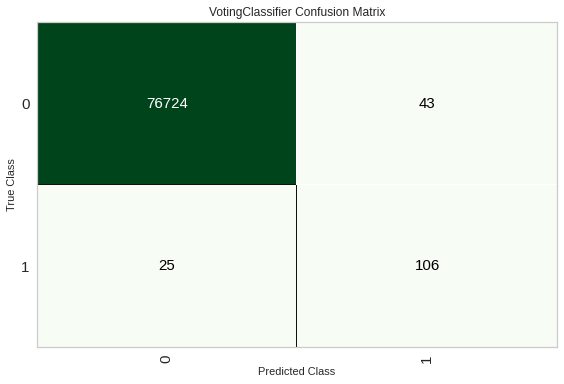

In [15]:
plot_model(blended_model,'confusion_matrix')

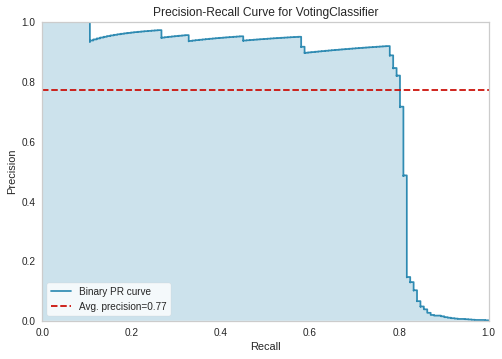

In [16]:
plot_model(blended_model,'pr')

In [21]:
from pycaret.utils import check_metric

unseen_predictions = predict_model(blended_model, data=data_unseen)
print(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'AUC'))
print(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'F1'))
print(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Recall'))
print(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Precision'))

0.9128
0.7835
0.8261
0.7451
